In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from test import data_prep
from sklearn.preprocessing import StandardScaler

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.9883095627776479
Test accuracy: 0.6677577741407529
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1070
           1       0.60      0.60      0.60       763

    accuracy                           0.67      1833
   macro avg       0.66      0.66      0.66      1833
weighted avg       0.67      0.67      0.67      1833

MLPClassifier(random_state=10)


/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
model_2 = MLPClassifier(max_iter=700, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 1.0
Test accuracy: 0.6726677577741408
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1070
           1       0.61      0.59      0.60       763

    accuracy                           0.67      1833
   macro avg       0.66      0.66      0.66      1833
weighted avg       0.67      0.67      0.67      1833

MLPClassifier(max_iter=700, random_state=10)


In [5]:
print(X_train.shape)

(4277, 73)


In [6]:
params = {'hidden_layer_sizes': [(x,) for x in range(4, 74, 20)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anacond

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(4,), (24,), (44,), (64,)]},
             return_train_score=True)

In [7]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([1.3331141 , 1.93647354, 2.50317054, 3.10463545]), 'std_fit_time': array([0.04345557, 0.04453558, 0.02331953, 0.02729455]), 'mean_score_time': array([0.00059054, 0.00078771, 0.00062528, 0.00069275]), 'std_score_time': array([3.24896297e-05, 5.95331626e-04, 7.28225109e-05, 1.50786133e-05]), 'param_hidden_layer_sizes': masked_array(data=[(4,), (24,), (44,), (64,)],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (4,)}, {'hidden_layer_sizes': (24,)}, {'hidden_layer_sizes': (44,)}, {'hidden_layer_sizes': (64,)}], 'split0_test_score': array([0.71495327, 0.71028037, 0.6682243 , 0.68457944]), 'split1_test_score': array([0.72663551, 0.71962617, 0.69392523, 0.70093458]), 'split2_test_score': array([0.71495327, 0.67523364, 0.6682243 , 0.66588785]), 'split3_test_score': array([0.70794393, 0.65654206, 0.62616822, 0.67056075]), 'split4_test_score': array([0.73598131, 0.71495327, 0.70327103, 0

Total number of models:  4


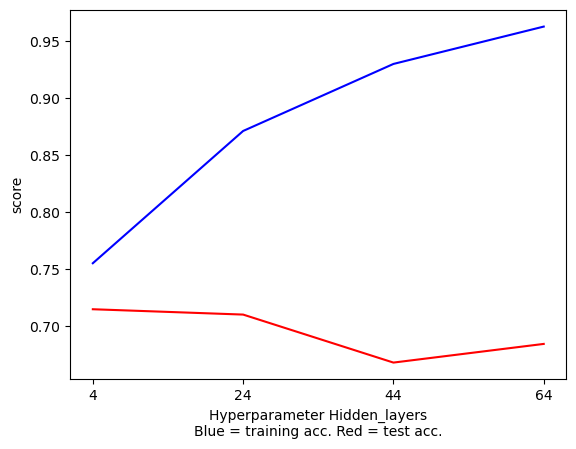

In [8]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(4, 74, 20))
plt.ylabel('score')
plt.show()

In [9]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.7540332008417114
Test accuracy: 0.7119476268412439
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1070
           1       0.68      0.58      0.63       763

    accuracy                           0.71      1833
   macro avg       0.71      0.69      0.70      1833
weighted avg       0.71      0.71      0.71      1833

{'hidden_layer_sizes': (4,)}


In [10]:
# new parameters
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anacond

Train accuracy: 0.7374327799859715
Test accuracy: 0.7168576104746317
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      1070
           1       0.73      0.51      0.60       763

    accuracy                           0.72      1833
   macro avg       0.72      0.69      0.69      1833
weighted avg       0.72      0.72      0.71      1833

{'hidden_layer_sizes': (3,)}


/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anacond

Train accuracy: 0.7383680149637597
Test accuracy: 0.7184942716857611
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      1070
           1       0.73      0.51      0.60       763

    accuracy                           0.72      1833
   macro avg       0.72      0.69      0.69      1833
weighted avg       0.72      0.72      0.71      1833

{'alpha': 0.01, 'hidden_layer_sizes': (3,)}


/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train)

print(rfe.n_features_)

45


In [ ]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# step = int((X_train_rfe.shape[1] + 5)/5);
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train)

print("Train accuracy:", rfe_cv.score(X_train_rfe, y_train))
print("Test accuracy:", rfe_cv.score(X_test_rfe, y_test))

y_pred = rfe_cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anacond

Train accuracy: 0.7666588730418518
Test accuracy: 0.7010365521003818
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1070
           1       0.66      0.59      0.62       763

    accuracy                           0.70      1833
   macro avg       0.69      0.68      0.69      1833
weighted avg       0.70      0.70      0.70      1833

{'alpha': 0.01, 'hidden_layer_sizes': (9,)}


/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}


In [18]:
from test import analyse_feature_importance

analyse_feature_importance(dt_best.best_estimator_, X.columns)

income_high : 0.34872370327525587
worried_4 : 0.17358118643050438
contacts_count : 0.06253753156021653
weight : 0.05905449496889916
insurance : 0.042566333400747454
age_90_100 : 0.03594748670892724
income_med : 0.03261246766501817
house_count : 0.03080801251684309
alcohol_3.013200498 : 0.027620018687811807
height : 0.0253540709215135
age_60_70 : 0.02278022300455977
age_80_90 : 0.01850049861484965
working_never : 0.014318373983829397
race_white : 0.014207934758972751
blood_type_abp : 0.012711737464550413
immigrant : 0.007080664064990596
worried_2 : 0.007032761092925618
working_travel critical : 0.007006217533884044
alcohol_1.0 : 0.006814198342017047
race_mixed : 0.006245251326428939


In [19]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)


(4277, 14)


In [20]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anacond

Train accuracy: 0.7374327799859715
Test accuracy: 0.7190398254228041
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1070
           1       0.69      0.60      0.64       763

    accuracy                           0.72      1833
   macro avg       0.71      0.70      0.70      1833
weighted avg       0.72      0.72      0.72      1833

{'alpha': 1e-05, 'hidden_layer_sizes': (9,)}


/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Comparing the models to find the best performing model<a name="compare"></a>

In [22]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_rfe)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with relu:", roc_index_nn_2)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with feature selection and gridsearch:", roc_index_rfe_cv)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.7119792751191191
ROC index on test for NN with relu: 0.7023640082801532
ROC index on test for NN with gridsearch 1: 0.7645992822233927
ROC index on test for NN with gridsearch 2: 0.772304356879509
ROC index on test for NN with gridsearch 3: 0.7720838794233291
ROC index on test for NN with feature selection and gridsearch: 0.7618861846376208
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.7711407258607809


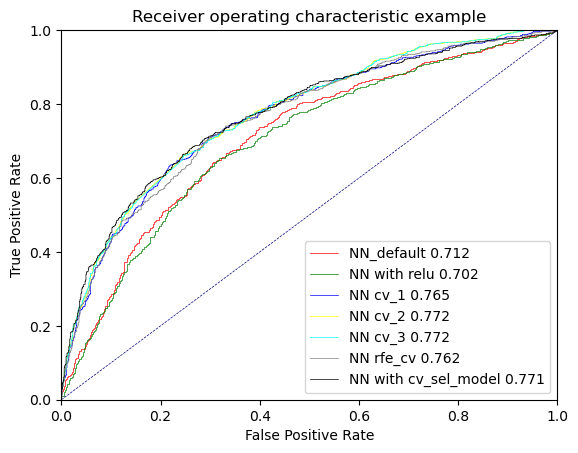

In [23]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with relu {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='NN rfe_cv {:.3f}'.format(roc_index_rfe_cv), color='gray', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


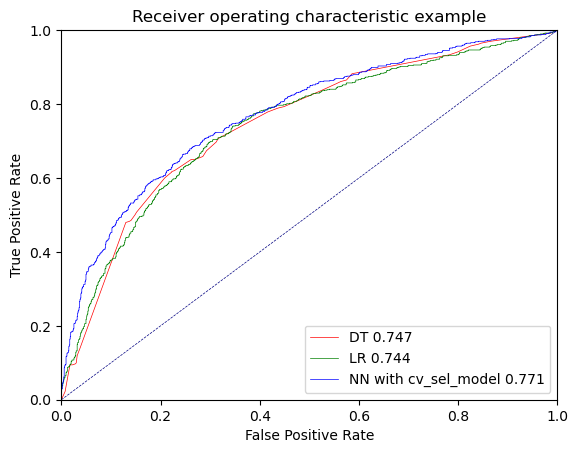

In [24]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr_cv, fpr_lr_cv, tpr_lr_cv = pickle.load(f)   
    

plt.plot(fpr_dt_cv, tpr_dt_cv, label='DT {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='LR {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 

In [27]:
covid_positive_indices = np.where(y_pred_proba_cv_sel_model[:, 1] > 0.5)[0]


In [28]:
covid_positive_features = X_test_sel_model[covid_positive_indices]


In [29]:
# Example: Print mean and standard deviation of selected features
print("Mean of Feature 1 for COVID positive individuals:", np.mean(covid_positive_features[:, 0]))
print("Standard Deviation of Feature 2 for COVID positive individuals:", np.std(covid_positive_features[:, 1]))
# Add more statements for other features as needed


Mean of Feature 1 for COVID positive individuals: -0.17017834508729474
Standard Deviation of Feature 2 for COVID positive individuals: 1.13566345047565


In [25]:
#ensemble

# import the model
from sklearn.ensemble import VotingClassifier

# load the best performing decision tree and logistic regression models that we have saved from last two pracs
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt, fpr_dt, tpr_dt = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr, fpr_lr, tpr_lr = pickle.load(f)    

# select the best performing neural network
nn_best = cv_sel_model

# initialise the classifier with 3 different estimators
voting = VotingClassifier(estimators=[('dt', dt_best), ('lr', lr_best), ('nn', nn_best)], voting='soft')

In [26]:
# fit the voting classifier to training data
voting.fit(X_train, y_train)

# evaluate train and test accuracy
print("Ensemble train accuracy:", voting.score(X_train, y_train))
print("Ensemble test accuracy:", voting.score(X_test, y_test))

# evaluate ROC auc score
y_pred_proba_ensemble = voting.predict_proba(X_test)
roc_index_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble[:, 1])
print("ROC score of voting classifier:", roc_index_ensemble)

/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/naman/opt/anacond

Ensemble train accuracy: 0.7486555997194295
Ensemble test accuracy: 0.7288597926895799
ROC score of voting classifier: 0.7781016891022893


/Users/naman/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
